In [151]:
using Polynomials
using LinearAlgebra
using JLD2, FileIO
using Plots


# Demo of polyfit functionality

In [169]:
x = range(0,stop=2*pi,length=100)
y = map(sin, x)

num_coeffs = 6
p = polyfit(x, y, num_coeffs-1, :t)

@show coeffs(p)

x2 = range(pi,stop=2*pi,length=10)
y2_true = map(sin, x2)
y2_est = polyval(p, x2)
@show y2_true
@show y2_est 
@show (y2_est - y2_true)
norm(y2_est - y2_true)./y2_true

t = range(0,stop=10,length = 100)
y = map(t->0.1, t)
p = polyfit(t,y,5,:t)

coeffs(p) = [0.0128679, 0.871069, 0.276754, -0.397869, 0.0879739, -0.00560059]
y2_true = [1.22465e-16, -0.34202, -0.642788, -0.866025, -0.984808, -0.984808, -0.866025, -0.642788, -0.34202, -2.44929e-16]
y2_est = [1.66187e-15, -0.338049, -0.637441, -0.863005, -0.986533, -0.990267, -0.870382, -0.640465, -0.335005, -0.0128679]
y2_est - y2_true = [1.5394e-15, 0.00397154, 0.00534633, 0.00302031, -0.00172535, -0.00545957, -0.00435631, 0.00232239, 0.00701546, -0.0128679]


Poly(0.10000000000000006 - 9.531213857312475e-17*t + 6.212603408933735e-17*t^2 - 1.6850713204784723e-17*t^3 + 1.9790052158011004e-18*t^4 - 8.281315220670178e-20*t^5)

# Helper functions

In [153]:
function recoverXUFromTrainInput(train_input) 
    # Input is now (13*50) + (6*50) + 2 + 13 = 965 
    num_rows = size(train_input, 1)
    N = 50
    x_dim = 13
    u_dim = 6
    all_X = zeros(num_rows, x_dim, N)
    all_U = zeros(num_rows, u_dim, N)
    for row = 1:num_rows
        for n = 1:N
            all_X[row, :, n] = train_input[row, ((n-1)*x_dim +1) : ((n-1)*x_dim +x_dim)]
            all_U[row, :, n] = train_input[row, (N*x_dim + (n-1)*u_dim +1) : (N*x_dim + (n-1)*u_dim +u_dim)]
        end        
    end
    return all_X, all_U
end

recoverXUFromTrainInput (generic function with 1 method)

In [154]:
function plotQuaternions(traj_X)
    gr(fmt=:png)
    plot()
    for i = 7:10
        plot!([collect(1:N)],[traj_X[i,:]],
            xlabel = "time t",
            ylabel = "q components",
            label = "q$(i-6)")
    end
    plot!()
end

plotQuaternions (generic function with 1 method)

In [155]:
function plotXYPosition(traj_X)
    gr(fmt=:png)
    plot()
    plot!([traj_X[1,:]],[traj_X[2,:]],
        xlabel = "x",
        ylabel = "y",
        legend = :none)
    plot!()
end

plotXYPosition (generic function with 1 method)

In [156]:
function plotXYPositionWithTime(traj_X)
    gr(fmt=:png)
    plot()
    plot!([collect(1:N)],[traj_X[1,:]],
        xlabel = "t",
        ylabel = "x or y",
        label = "x")
    plot!([collect(1:N)],[traj_X[2,:]],
        xlabel = "t",
        ylabel = "x or y",
        label = "y")
    plot!()
end

plotXYPositionWithTime (generic function with 1 method)

In [183]:
function plotCoeffs(coeffs)
    gr(fmt=:png)
    plot()
    plot!(coeffs,
        xlabel = "#",
        ylabel = "coeff",
        legend = :none)
    plot!()
end

plotCoeffs (generic function with 1 method)

In [184]:
# Get saved data
@load "FullISS.jld2" train_input_collected train_output_collected
@load "FullISSFirstOnly.jld2" train_input_collected_first_only train_output_collected_first_only
@load "FullISSLastOnly.jld2" train_input_collected_last_only train_output_collected_last_only
@show size(train_input_collected_last_only)
# Input is now (13*50) + (6*50) + 2 + 13 = 965 
all_X, all_U = recoverXUFromTrainInput(train_input_collected_last_only) 
@show size(all_X)
@show size(all_U)


size(train_input_collected_last_only) = (3, 965)
size(all_X) = (3, 13, 50)
size(all_U) = (3, 6, 50)


(3, 6, 50)

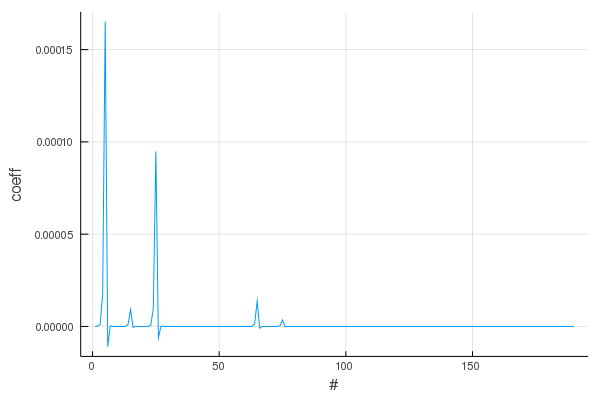

In [188]:
# Get fitted polynomial coefficients
N = 50
tf_guess = 100.
t_array = range(0,stop=tf_guess,length=N)
num_coeffs = 10
num_rows = size(all_X,1)
x_dim = size(all_X,2)
u_dim = size(all_U,2)
all_coeffs = zeros(num_rows, num_coeffs*(x_dim+u_dim))
for row = 1:num_rows
    for dim = 1:x_dim
        x_vals = all_X[row, dim, :]
        p = polyfit(t_array, x_vals, num_coeffs-1, :t)
        cf = coeffs(p)
        if (size(cf,1) == 1 && cf[1] == 0)
            cf = zeros(num_coeffs)
        end
        all_coeffs[row, ((dim-1)*num_coeffs +1):((dim-1)*num_coeffs +num_coeffs)] = cf
    end
    for dim = 1:u_dim
        u_vals = all_U[row, dim, :]
        p = polyfit(t_array, u_vals, num_coeffs-1, :t)
        cf = coeffs(p)
        if (size(cf,1) == 1 && cf[1] == 0)
            cf = zeros(num_coeffs)
        end
        all_coeffs[row, (num_coeffs*x_dim + (dim-1)*num_coeffs +1):(num_coeffs*x_dim + (dim-1)*num_coeffs +num_coeffs)] = cf
    end
end

plotCoeffs(all_coeffs[1,:])
plotCoeffs(all_coeffs[2,:])

In [ ]:
# Plot coefficients

In [ ]:
# Save new coefficients to a file

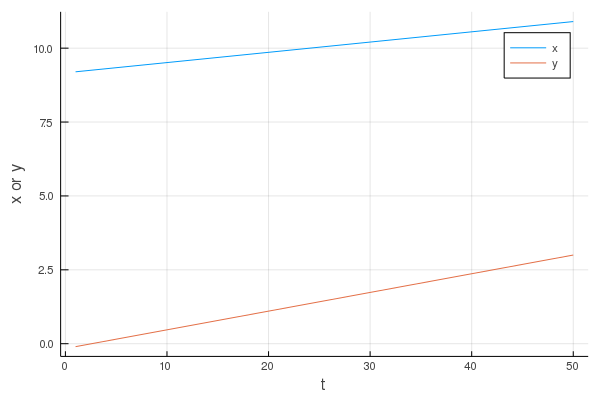

In [130]:
plotXYPositionWithTime(all_X[1,:,:])

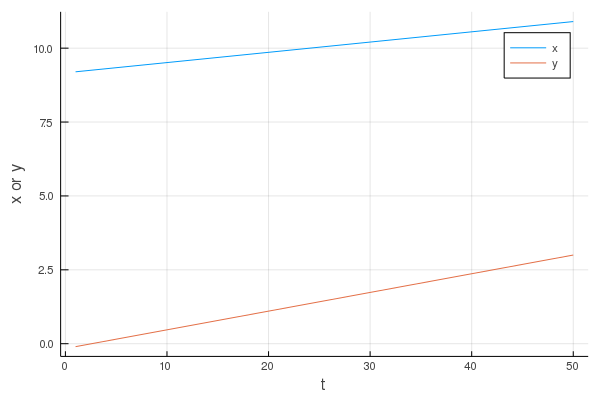

In [131]:
plotXYPositionWithTime(all_X[2,:,:])

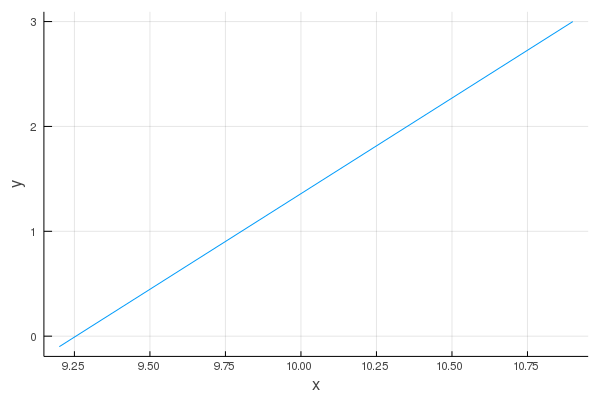

In [132]:
plotXYPosition(all_X[1,:,:])

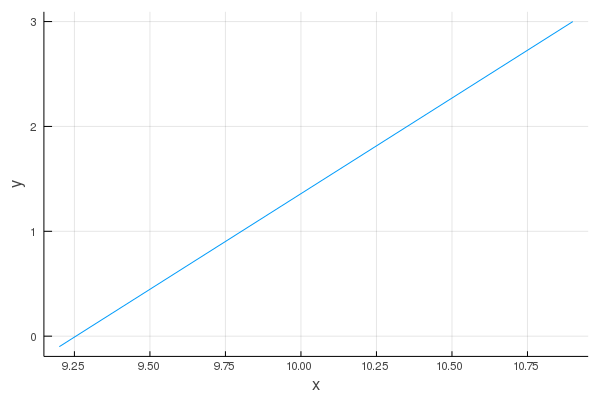

In [133]:
plotXYPosition(all_X[2,:,:])

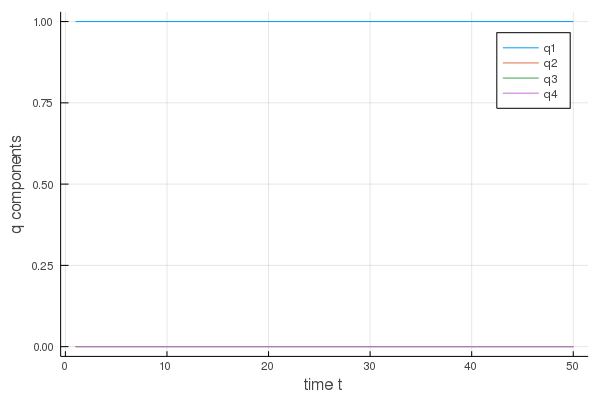

In [134]:
plotQuaternions(all_X[1,:,:])

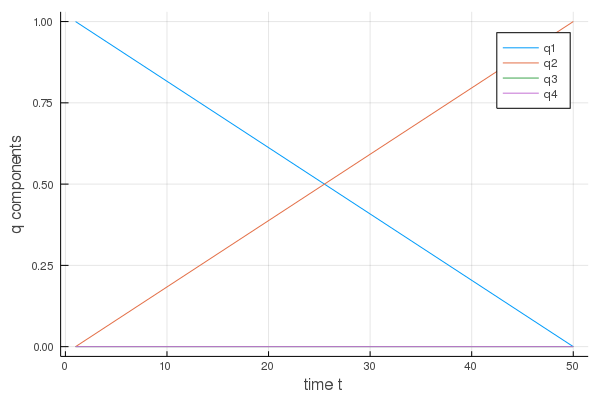

In [135]:
plotQuaternions(all_X[2,:,:])